# Статистика, DS-поток
## Задание SP.4

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  50 баллов
* Задача 2 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1;
* *средне-высокая:* задача 2.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.


<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил ввод параметеров экспоненциального распределения</font></b>
  * <b><font color="#00b565" size="3">Исправил ввод параметеров распределения Коши</font></b>
  * <b><font color="#00b565" size="3">Дал ответ на вопрос "является ли функция правдоподобия плотностью"</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Исправил ошибку во втором пункте</font></b>
  * <b><font color="#00b565" size="3">Добавил формулы в 3 пункте</font></b>
  * <b><font color="#00b565" size="3">Исправил арифметическую ошибку в 3 пункте</font></b>
  * <b><font color="#00b565" size="3">Добавил анализ разброса оценок</font></b>
  * <b><font color="#00b565" size="3">Добавил визуализацию</font></b>
  * <b><font color="#00b565" size="3">Добавил аналитику скорости сходимости</font></b>







In [2]:
# Bot check

# HW_ID: ds_sp4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import plotly
import plotly.graph_objects as go
import plotly.offline as pof

sns.set(font_scale=1.5, palette='Set2')

_______
## Задача 1.
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [4]:
def draw_likelihood(density_function, grid, samples, label):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(20, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

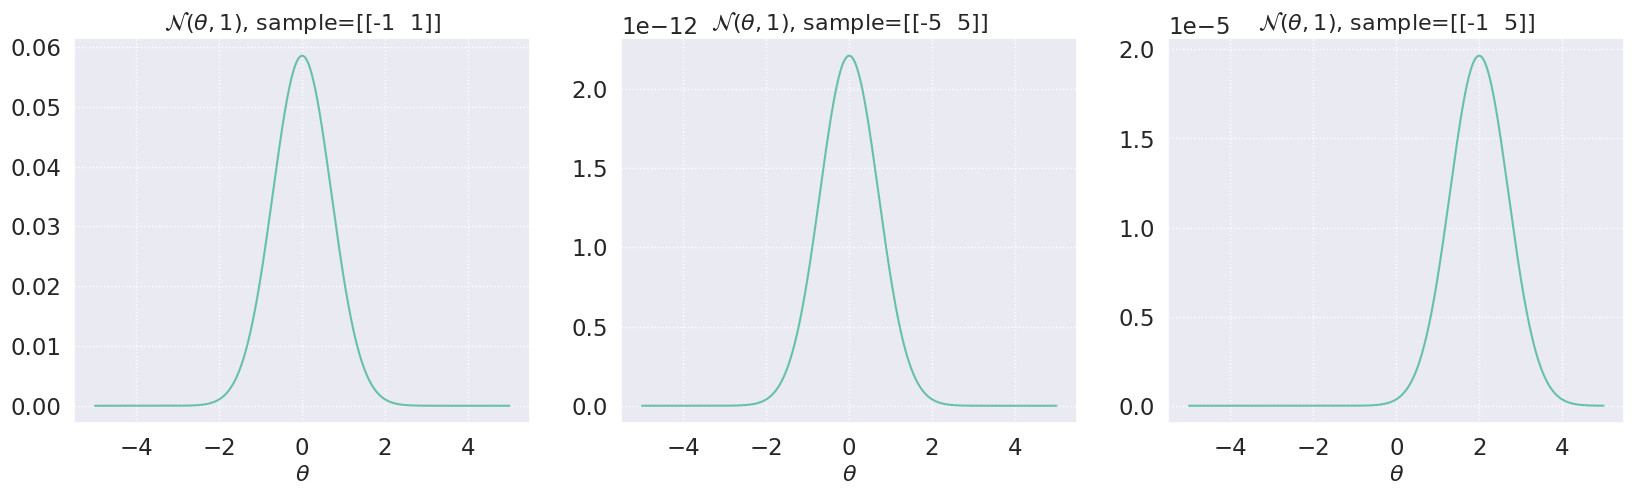

In [5]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

b)

<b><font color="#00b565" size="5">Исправил ввод параметеров экспоненциального распределения</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Неправильно передается параметр эксп. распр. Комм. Должно быть  `scale=1/grid`, а не `loc=1/grid`, поэтому графики для экспоненциального неправильные. Функция правдоподобия все-таки не может быть отрицательной</i>

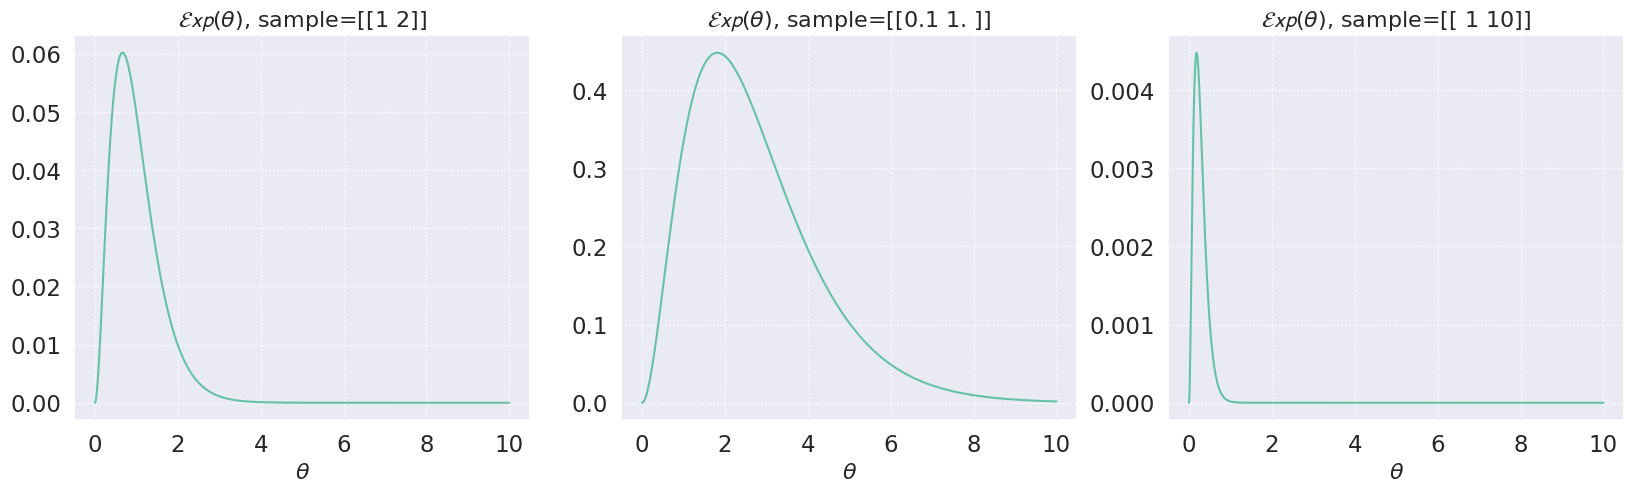

In [6]:
grid = np.linspace(1e-5, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$\\mathcal{Exp}(\\theta)$')

<b><font color="#00b565" size="5">Конец исправлений</font></b>

c)

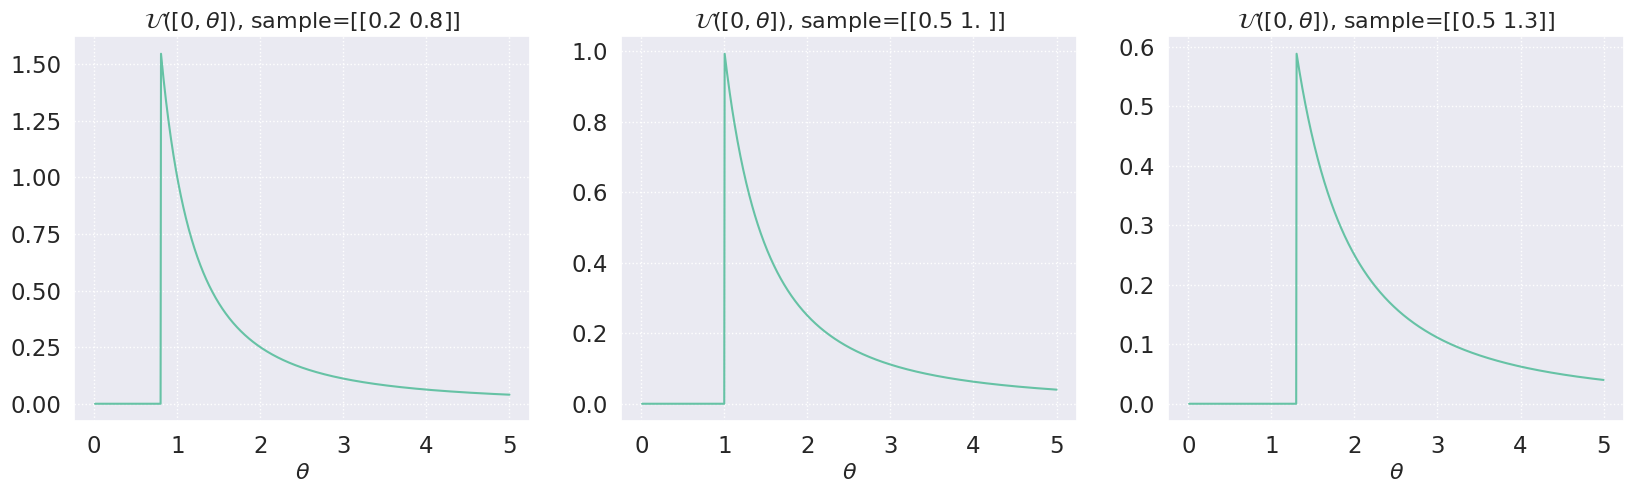

In [7]:
grid = np.linspace(0.01, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(loc = 0, scale = grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$\\mathcal{U}([0, \\theta])$')

d)

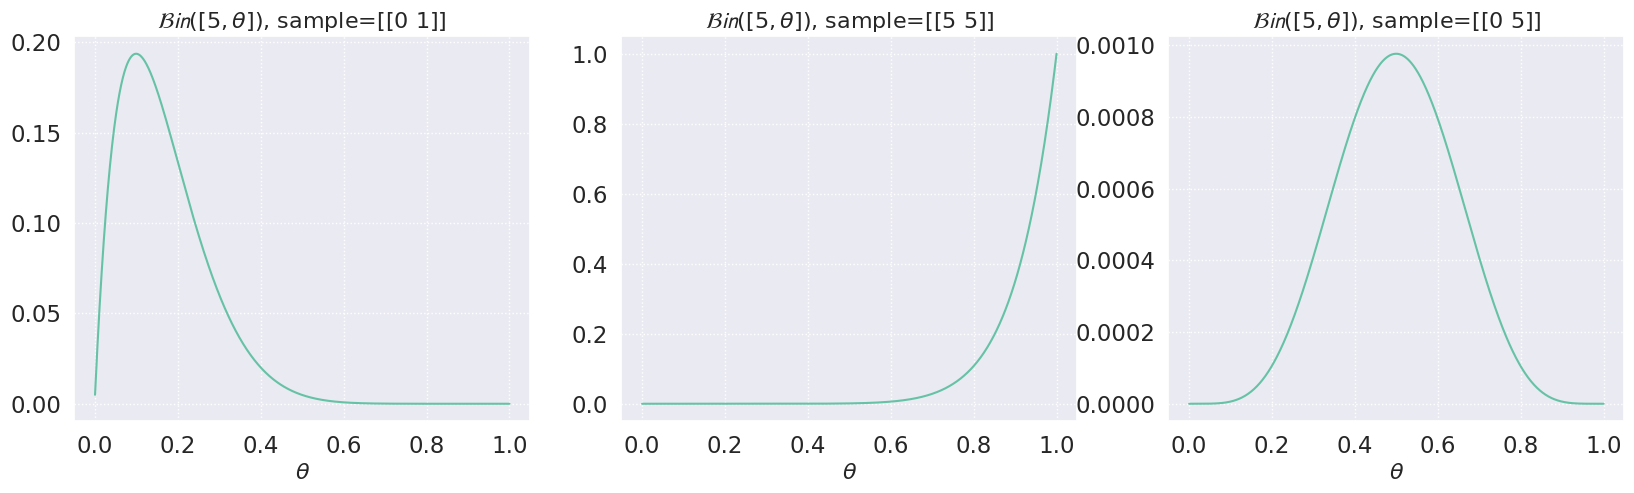

In [8]:
grid = np.linspace(0.001, 1, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n = 5, p = grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$\\mathcal{Bin}([5, \\theta])$')

e)

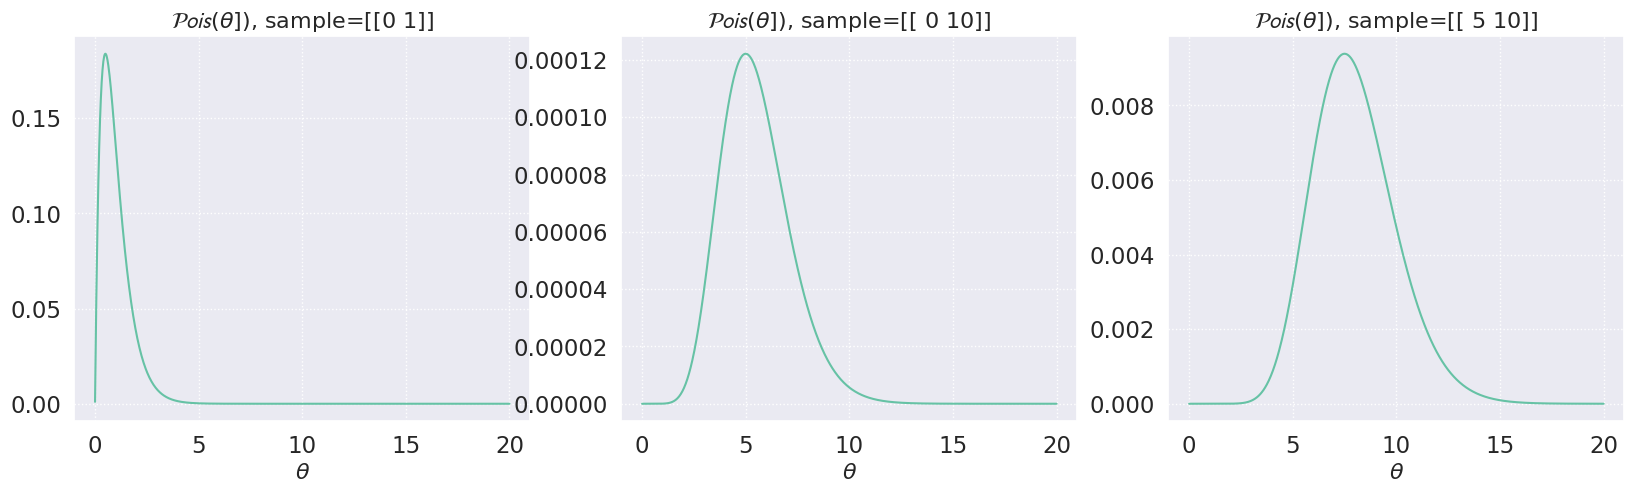

In [9]:
grid = np.linspace(0.001, 20, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$\\mathcal{Pois}(\\theta])$')

f)

<b><font color="#00b565" size="5">Исправил ввод параметеров распределения Коши</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Неправильно передается параметр распределения Коши . Комм. Правильно sps.cauchy(loc=grid), в условии написано именно про параметр сдвига.</i>

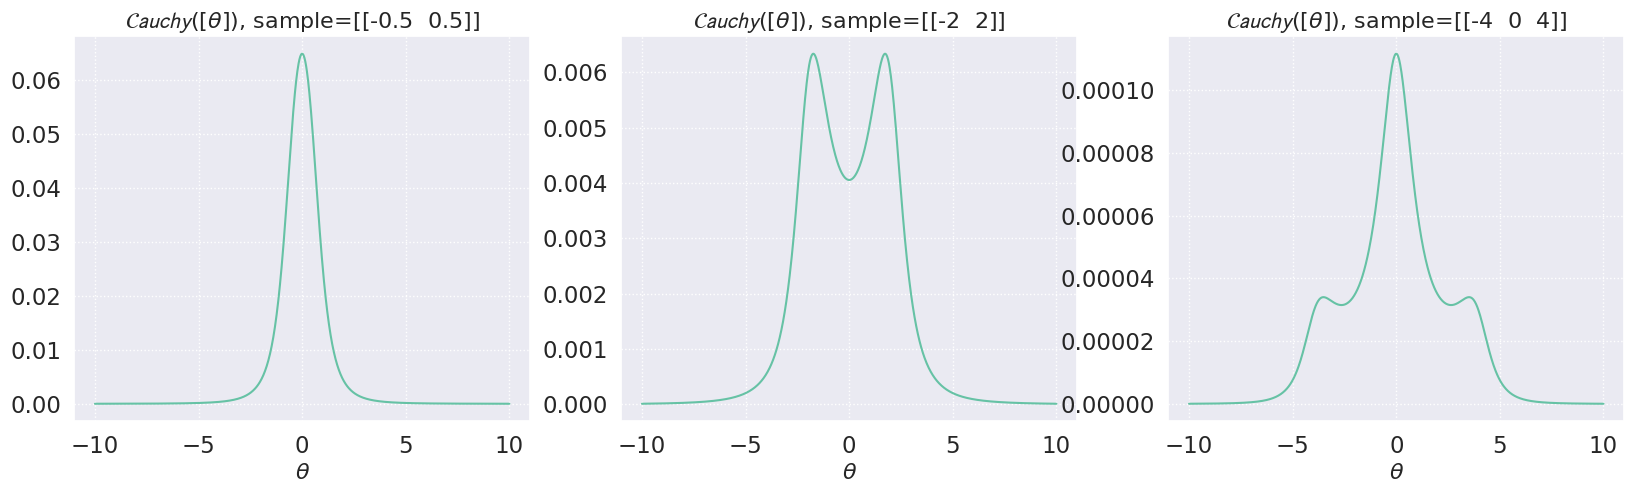

In [10]:
grid = np.linspace(-10, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$\\mathcal{Cauchy}([\\theta])$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

<b><font color="#00b565" size="5">Дал ответ на вопрос "является ли функция правдоподобия плотностью"</font></b>
<b><font color="#00b565" size="3">Замечание:</font></b>Нет ответа на вопрос является ли функция правдоподобия плотностью или он неправильный.


Функция правдоподобия не является плотностью, так как является функцией от параметра, а не от x.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


**Вывод:**

a) Выборка влияет на сдвиг пика. 

b) Выборка влияет на положение экстремума функции правдоподобия

c) Выборка влияет на носитель функции правдоподобия.

d) Выборка влияет на положение максимума функции правдоподобия

e) Выборка влияет на сдвиг и ширину пика.

f) Выборка влияет на сдвиг и ширину пика.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [11]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

Потому что при перемножении чисел, стоящих далеко от нуля мы получаем число близкое к нулю, не помещающееся в буффер Python.

Вместо этого можно рассмотреть сумму логарфимов, то есть использовать логарифмическую функцию правдоподобия. Тогда нам удастся избежать операций, которые переполняют буффер Python.

In [12]:
log_likelihood = np.log(sps.norm.pdf(sample)).sum()
print(f"log_likelihood: {log_likelihood:.0f}")

log_likelihood: -141886


______
## Задача 2. 
Компания выпустила $n$ серверов новой модели с увеличенным сроком службы. До начала продаж компания должна провести эксперимент по оценке среднего срока службы серверов. Известно, что сервера могут сломаться в любой момент независимо от того, сколько времени уже проработали. Таким образом, распределение времени работы сервера до поломки обладает свойством отсутствия памяти. Как вы знаете, таким свойством среди непрерывных распределений обладает только экспоненциальное распределение.

Компания начала проводить эксперимент, но сервера получились настолько хорошими, что многие еще не сломались, а бизнес уже требует запускать их продажи. Тем самым усложняется задача для аналитиков, которым приходит "обрезанная" выборка.

Рассмотрим задачу более формально. Пусть $X = (X_1, \ldots, X_n)$ &mdash; выборка из экспоненциального распределения с параметром $\theta$ с плотностью $p_\theta(x) = \theta e^{-\theta x}I\{x \geq 0\}$. \
При этом наблюдается выборка $Y = (Y_1, \ldots, Y_n)$, где, $Y_i$ определены следующим образом:
$$
\begin{equation}
  Y_i=\begin{cases}
    X_i, & \text{если $X_i \leq c$}.\\
    c, & \text{если $X_i > c$}.
  \end{cases}
\end{equation}
$$
Иначе говоря, $Y_i = \min(X_i, c)$, где $c$ &mdash; некоторая константа.
Выборка является смесью непрерывного и дискретного распределения, поэтому функция правдоподобия не определена. Вам предлагается реализовать и сравнить три подхода к оценке неизвестного параметра:
1. Рассмотреть подвыборку, состоящую из $Y_i < c$, и найти для нее ОМП. Учтите, что необходимо использовать условное распределение $Y_i$ при условии $Y_i < c$.
2. Найти оценку, используя метод моментов для всей выборки $Y$.
3. Найти ОМП по дискретизованной выборке $Y$, выполнив следующие действия.

    а) Разбить полуинтервал $[0, c)$ на $k$ бинов (множеств) вида $[a_i, a_{i+1})$, где $0=a_0<a_1<...<a_k=c$. В качестве границ бинов возьмите целые числа.
    
    б) Определить $Z_i$ как номер бина, в который попадает $Y_i$, считая при этом множество $\{c\}$ как $(k+1)$-й бин. Вам может помочь функция [`np.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).
    
    в) Найти вероятности $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$, которые определяют распределение $Z_i$, являющееся дискретным.
    
    г) Найти ОМП по выборке $Z_1, ..., Z_n$, используя ее распределение.

Рассмотрите $c = 10$, а в качестве истинного значения параметра возьмите $\theta = 0.15$. Обратите внимание на параметризацию в [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).
Получить точный ответ в виде формулы у вас скорее всего не получится, воспользуйтесь численными методами.

Насколько точным получается оценка в зависимости от подхода и размера выборки?

**Решение:**

In [13]:
N = 1000
c = 10
theta = 0.15
X = sps.expon.rvs(scale=1/theta, size = N)

In [14]:
def grid_search_equation(
    func, from_theta, to_theta, 
    step=0.1, num_iter=10, **kwargs
):
    result_theta = 0
    
    for i in range(num_iter):
        grid = np.mgrid[from_theta:to_theta:step]
        f_values = func(grid, **kwargs)
        ind = np.argmin(np.abs(f_values))
        result_theta = grid[ind]
        from_theta, to_theta = result_theta - step, result_theta + step
        step *= 0.1
        
    return result_theta

1. 

В этом случае новое распределение $W_i$ имеет вид $P(X_i| X_i < c)$. Тогда плотность имеет вид $p_{\theta}(x) = \theta \cdot e^{-\theta x} \cdot I\{0 < x < c\} \cdot \frac{1}{P(Y_i < c)} = \frac{\theta \cdot e^{-\theta x} }{1 - e^{-\theta c}} \cdot I\{0 < x < c\}$

In [15]:
def get_Y_i(X : np.array):
    return np.minimum(X, c)

Y_s = get_Y_i(X)

In [16]:
def density_function(X: np.array, theta_grid: np.array, c = c):
    mask = X < c
    tmp_X = X[mask]

    density = np.zeros((len(theta_grid), len(tmp_X)))

    for i, theta in enumerate(theta_grid):
        density[i, :] = (theta * np.exp(-theta * tmp_X) / (1 - np.exp(-theta * c)))
    
    return density

In [17]:
def func_likelihood_equation(theta, sample, C=10):
    '''Функция из уравнения правдоподобия'''
    
    subsample = sample[sample < C]
    k = subsample.shape[0]
    return subsample.sum() + C * k / (np.exp(C * theta) - 1) - k / theta

In [18]:
theta_MLE = grid_search_equation(
    func=func_likelihood_equation,
    from_theta=1e-10,
    to_theta=1,
    step=0.1,
    num_iter=10,
    sample=Y_s,
)

print(f"ОМП равна {theta_MLE:.3f}")

ОМП равна 0.136


2.

<b><font color="#00b565" size="5">Исправил ошибку во втором пункте</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Ошибка в 2-ом пункте. Инд. комм. Неверно вычислено матожидание


$E(Y_i) = \int\limits_0^c{x \theta e^{-\theta x}} + c \cdot \int\limits_c^\infty{\theta e^{-\theta x}} = \frac{1 - e^{-c\theta}}{\theta}$

<b><font color="#00b565" size="5">Конец исправлений</font></b>


In [19]:
Y_s = get_Y_i(X)

In [20]:
def get_solutin_of_moments_equation(theta: np.array, sample, c=c):
    return (1 - np.exp(-c * theta)) / theta - np.mean(sample)

In [21]:
theta_MLE = grid_search_equation(
    func=get_solutin_of_moments_equation,
    from_theta=1e-10,
    to_theta=1,
    step=0.1,
    num_iter=10,
    sample=Y_s,
)
print(f"ОМП равна {theta_MLE:.3f}")

ОМП равна 0.152


3.

<b><font color="#00b565" size="5">Добавил формулы в 3 пункт</font></b>

<b><font color="#00b565" size="5">Замечание:</font></b> Нет формул в третьем пункте. Комм. В третьем пункте не выписаны явно формулы, которые использовались для нахождения оценки.



Перед тем как начинать писать код, сделаем теоретические выкладки.

Начнем с того, что дискретизируем выборку, взяв в качестве границ бинов возьмем целые числа. В нашем случае $c=10$, тогда получаем: 
$$
p_1(\theta) = \mathsf{P}_\theta(Z_1 = 1) = 1 - e^{-\theta} \\
p_{c + 1}(\theta) = \mathsf{P}_\theta(Z_1 = c + 1) = e^{-c\theta} \\
$$
Для $j=2, \ldots, C$:
$$
p_j(\theta) = \mathsf{P}_\theta(Z_1 = j) = e^{-j\theta}(e^{\theta} - 1)
$$
Запишем функцию правдоподобия:
$$
L_{Z}(\theta) = \left(1 - e^{-\theta}\right)^{\sum_{i=1}^n I\{Z_i = 1\}} \left(e^{-c\theta}\right)^{\sum_{i=1}^n I\{Z_i=c + 1\}} \prod_{j=2}^c \left(e^{j\theta}(e^\theta - 1)\right)^{\sum_{i=1}^n I\{Z_i = j\}} \\
l_{Z}(\theta) = \left(\sum_{i=1}^n I\{Z_i = 1\}\right)\ln(1 - e^{-\theta}) - c\theta\left(\sum_{i=1}^n I\{Z_i=c + 1\}\right) + \sum_{j=2}^c\left(\sum_{i=1}^n I\{Z_i = j\}\right)\left(-j\theta + \ln(e^\theta -1) \right)
$$
Введем обозначение:
$$
n_j = \sum_{i=1}^n I\{Z_i = j\}
$$
Тогда: 
$$
l_{Z}(\theta) =n_1\ln(1 - e^{-\theta}) - c\theta n_{c+1} + \sum_{j=2}^cn_j\left(-j\theta + \ln(e^\theta -1) \right)
$$
Уравнение правдоподобия примет вид:
$$
\frac{\partial l_Z(\theta)}{\partial \theta} = \frac{ n_1}{e^{\theta} - 1} - cn_{c+1} + \sum_{j=2}^c n_j\left(-j + \frac{e^\theta}{e^\theta - 1}\right) = 0
$$
Для его решения снова воспользуемся поиском по сетке.



<b><font color="#00b565" size="5">Конец исправлений</font></b>


a)

In [22]:
k = 5
def create_bins(c, k):
    boundry = np.linspace(0, c, k + 1).astype(int)
    
    return boundry

bins = create_bins(c, k)
print("Границы бинов:", bins)

Границы бинов: [ 0  2  4  6  8 10]


<b><font color="#00b565" size="5">Исправил арифметическую ошибку в 3 пункте</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Арифм. ошибка в 3-ем пункте. Инд. комм. Не выведена сама оценка. Но если она отличается от параметра в 2 раза, то где-то точно ошибка



Формула для оценки была получена выше.

In [23]:
def discretized_loglikelihood_equation(theta, sample, C=10):
    
    bins = create_bins(c, c)
    Z_s = np.digitize(sample, bins)
    unique, counts = np.unique(Z_s, return_counts=True)

    return counts[0] /  (np.exp(theta) - 1) - \
           C * counts[-1] + \
           (counts[1:-1].reshape(-1, 1) @ (np.exp(theta) / (np.exp(theta) - 1)).reshape(1, -1)).sum(axis=0) - \
           (counts[1:-1] * unique[1:-1]).sum()


theta_MLE = grid_search_equation(
    func=discretized_loglikelihood_equation,
    from_theta=1e-10,
    to_theta=1,
    step=0.1,
    num_iter=10,
    sample=Y_s,
)
print(f"ОМП равна {theta_MLE:.3f}")

ОМП равна 0.156


<b><font color="#00b565" size="5">Конец исправлений</font></b>


Теперь посмотрим как себя ведут предложенные методы в зависимости от выборки.

In [25]:
samples_count = 100
max_sample_size = 500

method_traces = {
    "first": np.zeros((samples_count, max_sample_size)),
    "second": np.zeros((samples_count, max_sample_size)),
    "third": np.zeros((samples_count, max_sample_size)),
}

n_list = np.arange(1, max_sample_size + 1)

params = {
    'from_theta': 1e-10, 
    'to_theta': 1, 
    'step': 0.1, 
    'num_iter': 10,
}

sample = sps.expon(scale=1/theta).rvs(size=(samples_count, max_sample_size))
sample[sample >= c] = c

methods = {
    "first": func_likelihood_equation,
    "second": get_solutin_of_moments_equation,
    "third": discretized_loglikelihood_equation,
}

def apply_grid_search(method_key, i, n):
    method_trace = method_traces[method_key]
    method_func = methods[method_key]
    
    method_trace[i, n-1] = grid_search_equation(
        func=method_func, 
        **params,
        sample=sample[i, :n]
    )

for i in tqdm(range(samples_count)):
    for n in n_list:
        for method_key in methods.keys():
            apply_grid_search(method_key, i, n)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [02:38<00:00,  1.59s/it]


<b><font color="#00b565" size="5">Добавил визуализацию</font></b>

<b><font color="#00b565" size="5">Замечание: </font></b> Нет визуализации - наглядного графика сравнения трех оценок по отношению к истинной. . Комм. Также можно было поэкспериментировать с тем, как ведут себя оценки в зависимости от размера выборки. 

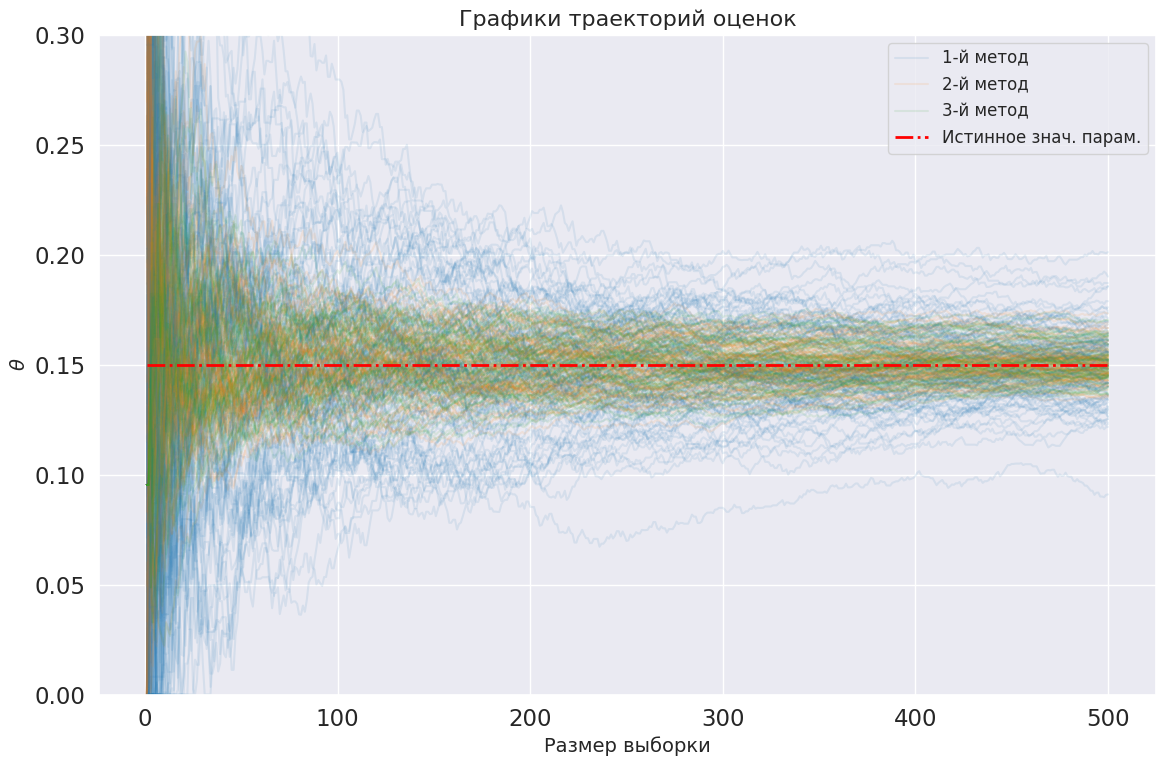

In [31]:
colors = [
    '#1f77b4',  
    '#ff7f0e',  
    '#2ca02c'   
]

plt.figure(figsize=(12, 8))

for i in range(samples_count):
    for j, method_vals in enumerate([method_traces["first"], method_traces["second"], method_traces["third"]]):
        plt.plot(
            n_list, method_vals[i],
            color=colors[j], alpha=0.1,  
            label=f'{j+1}-й метод' if i == 0 else None 
        )

plt.plot(n_list, np.full(len(n_list), theta),color="r", ls="dashdot", linewidth=2, label="Истинное знач. парам.")

plt.ylim(0, 0.3)
plt.title("Графики траекторий оценок", fontsize=16)
plt.xlabel("Размер выборки", fontsize=14)
plt.ylabel(r"$\theta$", fontsize=14)

plt.legend(loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()


<b><font color="#00b565" size="5">Конец исправлений</font></b>


<b><font color="#00b565" size="5">Добавил анализ разброса оценок</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Нет анализа разбросов оценок. Комм. Стоило сравнить подходы для разных n. Это может повлиять на выводы. 


Из графика видим, что в зависимости от n методы 2 и 3 имеют примерно одинаковоый разброс оценок, в то время как 1-й подход дает разброс примерно в 2 раза больший. Вероятно это происходит из-за использования всей выбоорки.

<b><font color="#00b565" size="5">Конец исправлений</font></b>


<b><font color="#00b565" size="5">Добавил аналитику скорости сходимости</font></b>

<b><font color="#00b565" size="3">Замечание: </font></b> Нет аналитики скорости сходимости различных методов.


Из графика видно, что все 3 метода предоставляют асимтотически несмещенные оценки $\theta$

<b><font color="#00b565" size="5">Конец исправлений</font></b>


**Вывод:** 

Как видим, методы демонстрируют результаты, близкие к истинному значению параметра.

При увеличении объема выборки n, первый метод показывает больший разброс по сравнению со вторым и третьим. Это связано с тем, что в первом методе используется не вся выборка.

Все три метода предоставляют асимптотически несмещенные оценки параметра.